# Submitted by Gomathy Sankar K
## Task 3
### Predicting the Iris Species using Decision Tree Algorithm

#### Loading in the Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#### Iris Dataset 

In [2]:
iris = pd.read_csv('E:\Data Science in Python\GRIP Tasks\Iris.csv')
iris = iris.set_index('Id')
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [3]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Exploratory Data Analysis

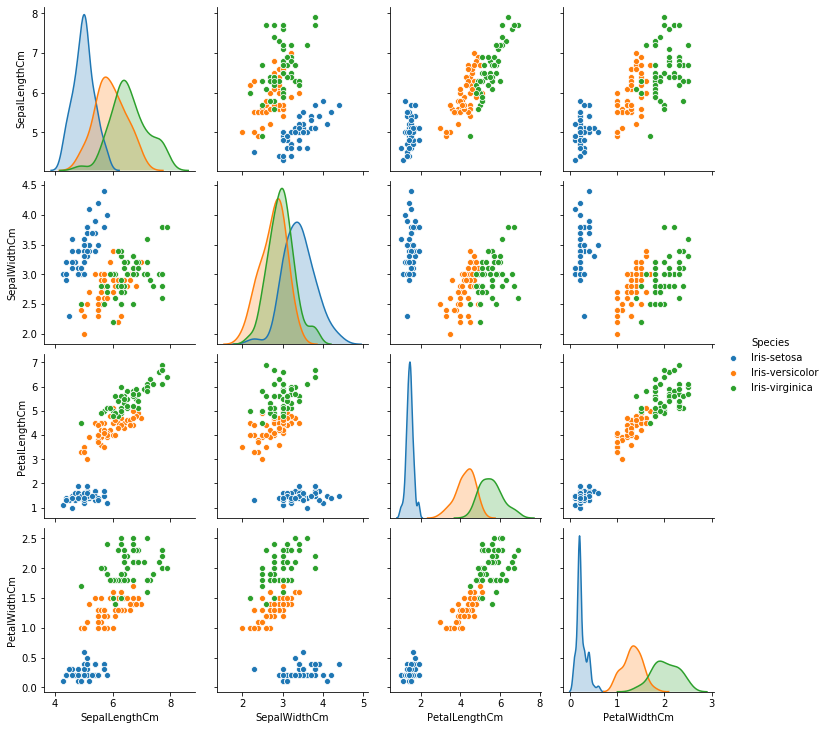

In [4]:
sns.pairplot(iris, hue = 'Species')

#### Creating Training and Test Datasets

In [5]:
from sklearn.model_selection import train_test_split

X = iris.iloc[:, 0:4].values
y = iris.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#### Decision Tree Classification

[Text(267.84000000000003, 587.0880000000001, 'PetalWidthCm <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-setosa'),
 Text(200.88000000000002, 456.624, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-virginica'),
 Text(334.80000000000007, 456.624, 'PetalLengthCm <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = Iris-setosa'),
 Text(133.92000000000002, 326.1600000000001, 'PetalWidthCm <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = Iris-versicolor'),
 Text(66.96000000000001, 195.69600000000003, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(200.88000000000002, 195.69600000000003, 'SepalWidthCm <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-setosa'),
 Text(133.92000000000002, 65.23200000000008, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-setosa'),
 Text(267.84000000000003, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versi

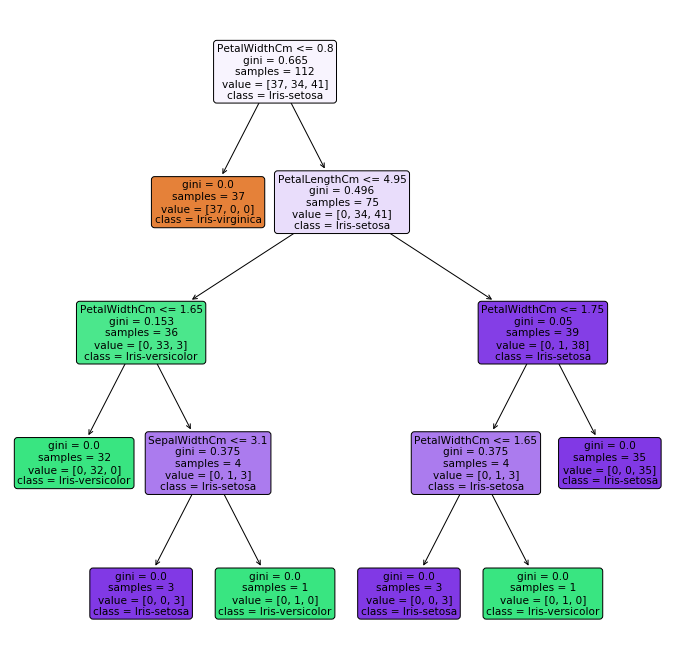

In [6]:
tree_fit = DecisionTreeClassifier(random_state = 0)
tree_fit.fit(X_train, y_train)

fig1, ax1 = plt.subplots(figsize = (12, 12))
plot_tree(tree_fit, feature_names = iris.columns, filled = True, rounded = True, 
          class_names = list(set(iris['Species'].values)), ax = ax1)

#### Performing Predictions based on the Decision Tree Classification Model

In [7]:
y_pred = tree_fit.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

report = classification_report(y_test, y_pred, output_dict = True)
report = pd.DataFrame(report)
report

,Iris-setosa,Iris-versicolor,Iris-virginica,accuracy,macro avg,weighted avg
precision,1.0,1.000000,0.900000,0.973684,0.966667,0.976316
recall,1.0,0.937500,1.000000,0.973684,0.979167,0.973684
f1-score,1.0,0.967742,0.947368,0.973684,0.971703,0.973952
support,13.0,16.000000,9.000000,0.973684,38.000000,38.000000


In [8]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [9]:
accuracy_score(y_test, y_pred)

0.9736842105263158

## Thank You